# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | betio village
Processing Record 3 of Set 1 | invercargill
Processing Record 4 of Set 1 | kupino
Processing Record 5 of Set 1 | eydhafushi
Processing Record 6 of Set 1 | belmonte
Processing Record 7 of Set 1 | arteche
Processing Record 8 of Set 1 | georgetown
Processing Record 9 of Set 1 | simenqian
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | sinabang
Processing Record 12 of Set 1 | puerto natales
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | champerico
Processing Record 15 of Set 1 | springs
Processing Record 16 of Set 1 | dedovichi
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | pontes e lacerda
Processing Record 19 of Set 1 | mount gambier
Processing Record 20 of Set 1 | uturoa
Processing Record 21 of Set 1 | vadso
Processing Record 22 of Set 1 | tazacorte
Proce

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,277.12,97,100,4.22,GS,1712192067
1,betio village,1.3580,172.9211,300.17,75,11,2.99,KI,1712192067
2,invercargill,-46.4000,168.3500,286.49,63,96,5.36,NZ,1712191841
3,kupino,54.3663,77.2981,274.54,97,84,3.61,RU,1712192067
4,eydhafushi,5.1033,73.0708,301.89,73,100,0.84,MV,1712192068


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,277.12,97,100,4.22,GS,1712192067
1,betio village,1.3580,172.9211,300.17,75,11,2.99,KI,1712192067
2,invercargill,-46.4000,168.3500,286.49,63,96,5.36,NZ,1712191841
3,kupino,54.3663,77.2981,274.54,97,84,3.61,RU,1712192067
4,eydhafushi,5.1033,73.0708,301.89,73,100,0.84,MV,1712192068


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

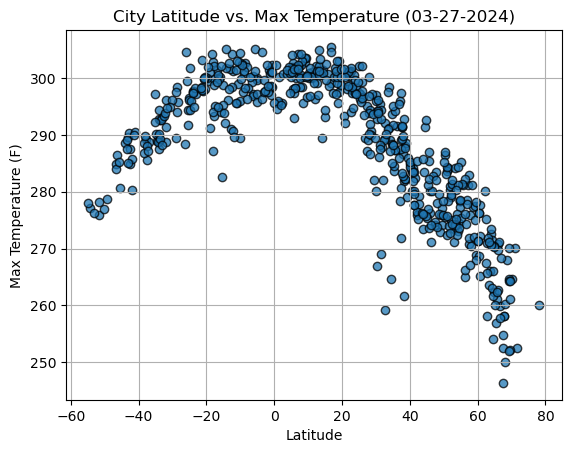

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (03-27-2024)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

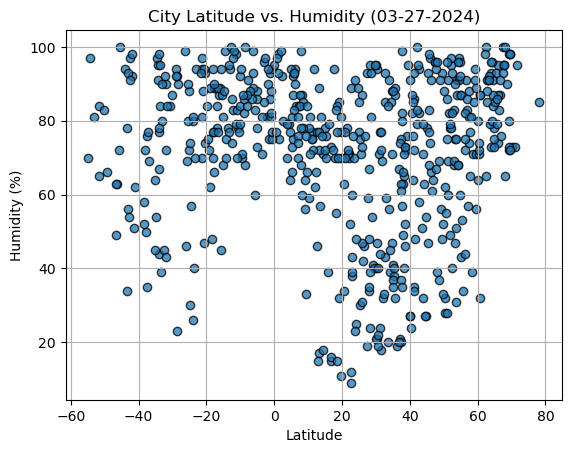

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (03-27-2024)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

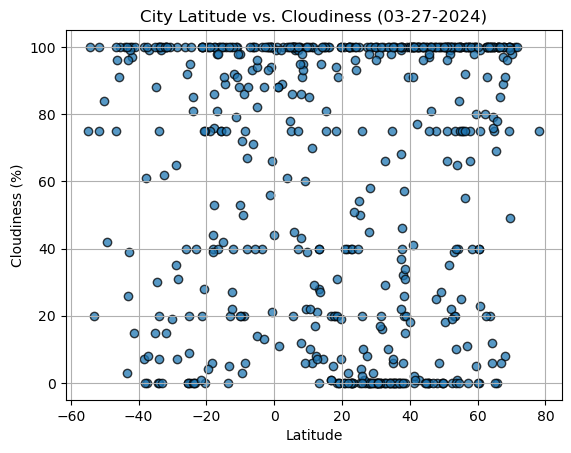

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (03-27-2024)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

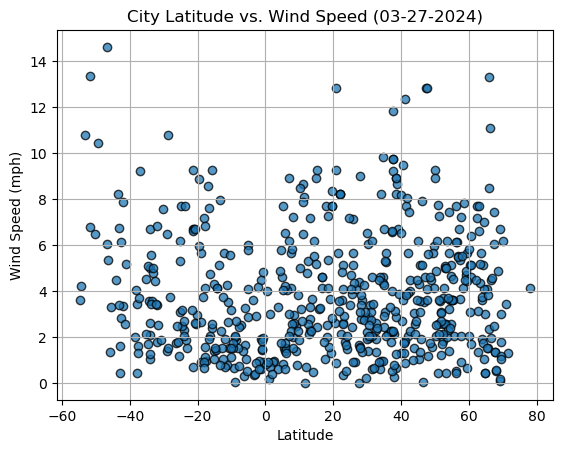

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (03-27-2024)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,betio village,1.3580,172.9211,300.17,75,11,2.99,KI,1712192067
3,kupino,54.3663,77.2981,274.54,97,84,3.61,RU,1712192067
4,eydhafushi,5.1033,73.0708,301.89,73,100,0.84,MV,1712192068
6,arteche,12.2645,125.4048,302.18,66,8,4.78,PH,1712192068
7,georgetown,5.4112,100.3354,302.56,87,20,1.54,MY,1712192068


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,277.12,97,100,4.22,GS,1712192067
2,invercargill,-46.4000,168.3500,286.49,63,96,5.36,NZ,1712191841
5,belmonte,-15.8631,-38.8828,300.15,89,100,2.40,BR,1712191936
9,adamstown,-25.0660,-130.1015,296.48,72,9,5.30,PN,1712192052
11,puerto natales,-51.7236,-72.4875,275.92,84,100,6.78,CL,1712192068


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8912165792555473


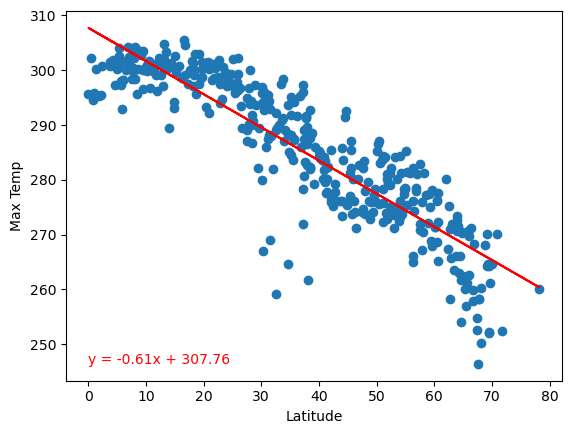

In [29]:
# Linear regression on Northern Hemisphere
# values
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
plt.text(min(x_values), min(y_values), line_eq, color="red")

# r-value
print(f"The r-value is: {rvalue}")

# scatter plot
plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

# line
plt.plot(x_values, regress_values, "r-")
plt.show()


The r-value is: 0.7861084916174064


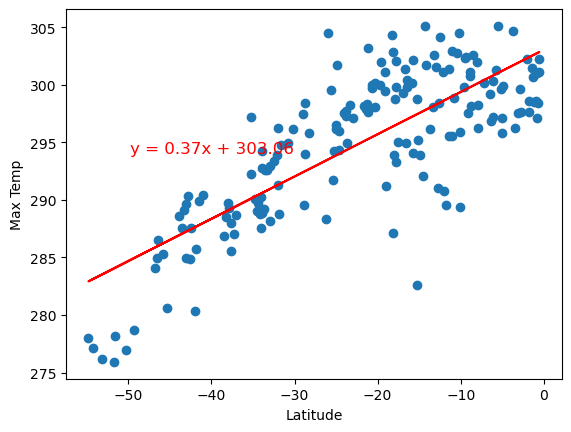

In [49]:
# values
x_values_south = southern_hemi_df["Lat"]
y_values_south = southern_hemi_df["Max Temp"]

# linear regression
slope_south, intercept_south, rvalue_south, pvalue_south, stderr_south = linregress(x_values_south, y_values_south)
regress_values_south = slope_south * x_values_south + intercept_south

# line
line_eq_south = f"y = {round(slope_south, 2)}x + {round(intercept_south, 2)}"

# r-value
print(f"The r-value is: {rvalue_south}")

# scatter plot
plt.scatter(x_values_south, y_values_south)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

# line
plt.plot(x_values_south, regress_values_south, "r-")

plt.text(min(x_values_south) + 5, max(y_values_south) - 10, line_eq_south, color="red", fontsize=12, va='top')
plt.show()


**Discussion about the linear relationship:** Shows the correlation between maximum temperature and latitude.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.1557015707648976


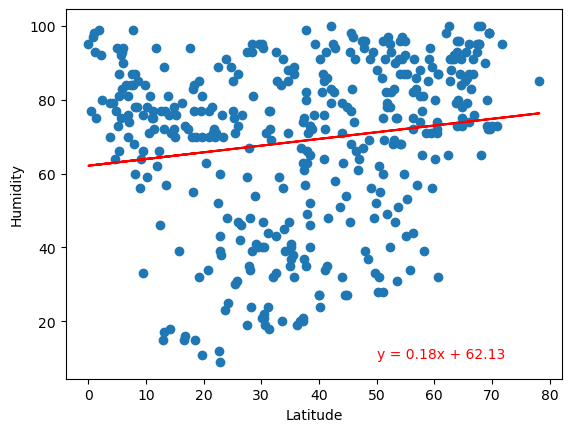

In [55]:
# Northern Hemisphere
humidity = northern_hemi_df["Humidity"]
latitude = northern_hemi_df["Lat"]

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, humidity)
regress_values = latitude * slope + intercept

# r-value
print(f"The r-value is: {rvalue}")

# scatter plot
plt.scatter(latitude, humidity, label='Data')

# regression line
plt.plot(latitude, regress_values, "r-")
plt.text(50, 10, f'y = {round(slope,2)}x + {round(intercept,2)}', color='red')

# plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()


The r-value is: 0.2727334172716778


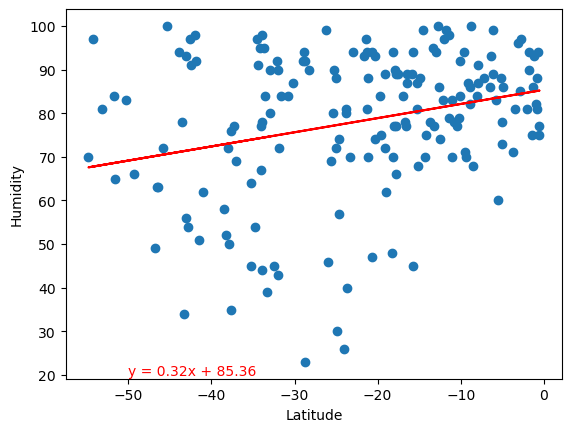

In [58]:
# Southern Hemisphere
humidity_south = southern_hemi_df["Humidity"]
latitude_south = southern_hemi_df["Lat"]

# linear regression
(slope_south, intercept_south, rvalue_south, pvalue_south, stderr_south) = linregress(latitude_south, humidity_south)
regress_values_south = latitude_south * slope_south + intercept_south

# r-value
print(f"The r-value is: {rvalue_south}")

# scatter plot
plt.scatter(latitude_south, humidity_south, label='Data')

# regression line
plt.plot(latitude_south, regress_values_south, "r-")
plt.text(-50, 20, f'y = {round(slope_south,2)}x + {round(intercept_south,2)}', color='red')

# plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.12432912977852148


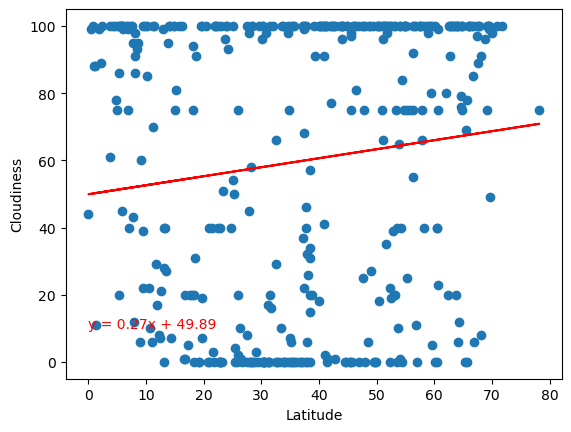

In [60]:
# Northern Hemisphere
cloudiness_north = northern_hemi_df["Cloudiness"]
latitude_north = northern_hemi_df["Lat"]

# linear regression
(slope_cloudiness_north, intercept_cloudiness_north, rvalue_cloudiness_north, pvalue_cloudiness_north, stderr_cloudiness_north) = linregress(latitude_north, cloudiness_north)
regress_values_cloudiness_north = latitude_north * slope_cloudiness_north + intercept_cloudiness_north

# the r-value
print(f"The r-value is: {rvalue_cloudiness_north}")

# scatter plot
plt.scatter(latitude_north, cloudiness_north, label='Data')

# regression line
plt.plot(latitude_north, regress_values_cloudiness_north, "r-")
plt.text(0, 10, f'y = {round(slope_cloudiness_north,2)}x + {round(intercept_cloudiness_north,2)}', color='red')

# plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

The r-value is: 0.06258548735095278


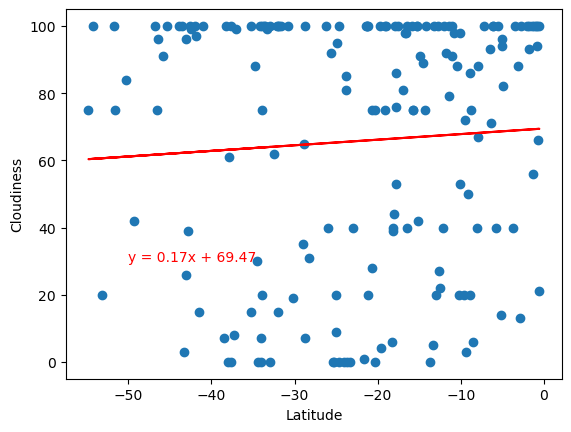

In [69]:
# Southern Hemisphere
cloudiness_south = southern_hemi_df["Cloudiness"]
latitude_south = southern_hemi_df["Lat"]

# linear regression
(slope_cloudiness_south, intercept_cloudiness_south, rvalue_cloudiness_south, pvalue_cloudiness_south, stderr_cloudiness_south) = linregress(latitude_south, cloudiness_south)
regress_values_cloudiness_south = latitude_south * slope_cloudiness_south + intercept_cloudiness_south

# r-value
print(f"The r-value is: {rvalue_cloudiness_south}")

# scatter plot
plt.scatter(latitude_south, cloudiness_south, label='Data')

# regression line
plt.plot(latitude_south, regress_values_cloudiness_south, "r-")
plt.text(-50, 30, f'y = {round(slope_cloudiness_south,2)}x + {round(intercept_cloudiness_south,2)}', color='red')

# plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

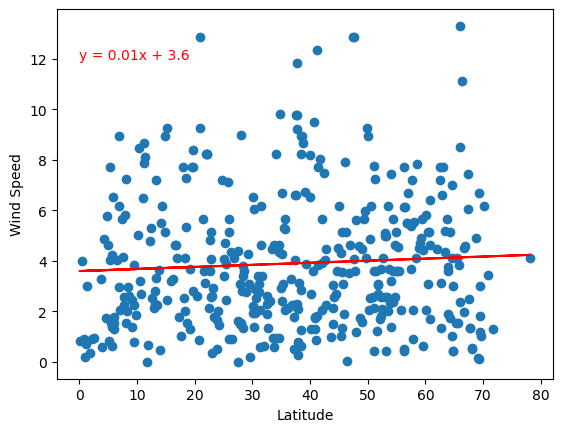

In [76]:
# Northern Hemisphere
wind_speed_north = northern_hemi_df["Wind Speed"]
latitude_north = northern_hemi_df["Lat"]

# linear regression
(slope_wind_speed_north, intercept_wind_speed_north, rvalue_wind_speed_north, pvalue_wind_speed_north, stderr_wind_speed_north) = linregress(latitude_north, wind_speed_north)
regress_values_wind_speed_north = latitude_north * slope_wind_speed_north + intercept_wind_speed_north

# plot
plt.scatter(latitude_north, wind_speed_north)
plt.plot(latitude_north, regress_values_wind_speed_north, "r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.text(0, 12, f'y = {round(slope_wind_speed_north,2)}x + {round(intercept_wind_speed_north,2)}', color='red')
plt.show()

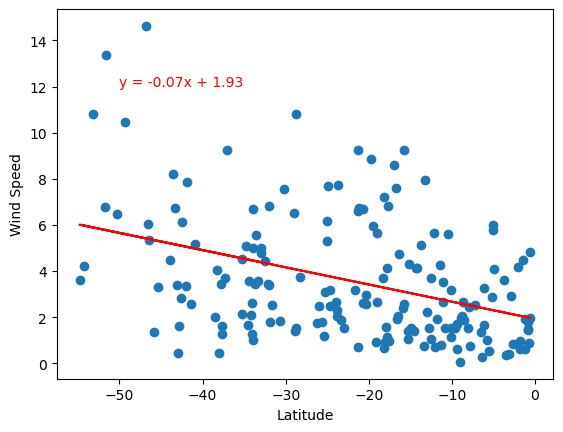

In [75]:
# Southern Hemisphere
wind_speed_south = southern_hemi_df["Wind Speed"]
latitude_south = southern_hemi_df["Lat"]

# linear regression
(slope_wind_speed_south, intercept_wind_speed_south, rvalue_wind_speed_south, pvalue_wind_speed_south, stderr_wind_speed_south) = linregress(latitude_south, wind_speed_south)
regress_values_wind_speed_south = latitude_south * slope_wind_speed_south + intercept_wind_speed_south

# plot
plt.scatter(latitude_south, wind_speed_south)
plt.plot(latitude_south, regress_values_wind_speed_south, "r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.text(-50, 12, f'y = {round(slope_wind_speed_south,2)}x + {round(intercept_wind_speed_south,2)}', color='red')
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE